In [25]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct

In [14]:
# 1️⃣ Buka gambar dan ubah ke grayscale
img = Image.open("img/png.png").convert("L")

# 2️⃣ Ubah jadi array numpy
data = np.array(img)

# 3️⃣ Pilih baris piksel (0 berarti paling atas)
row_index = 100
row_data = data[row_index, :]

# 4️⃣ Buat strip horizontal tipis (biar keliatan visualnya)
strip_height = 5
strip = np.tile(row_data, (strip_height, 1))

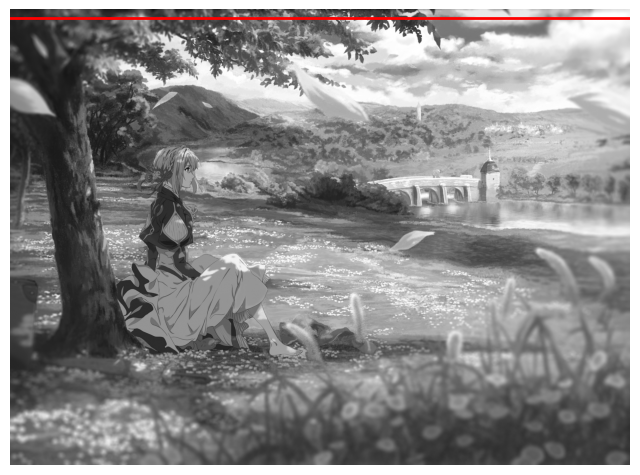

In [19]:
# ==============================================================
# GAMBAR 1: Gambar asli dengan garis merah di baris yang diambil
# ==============================================================
plt.figure(figsize=(8, 6))
plt.imshow(data, cmap='gray')
plt.axhline(y=row_index, color='red', linewidth=2)
plt.axis('off')
plt.show()

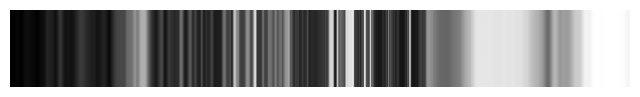

In [16]:
# ==============================================================
# GAMBAR 2: Visualisasi baris piksel sebagai strip horizontal
# ==============================================================
plt.figure(figsize=(8, 1))
plt.imshow(strip, cmap='gray', aspect='auto')
plt.axis('off')
plt.show()

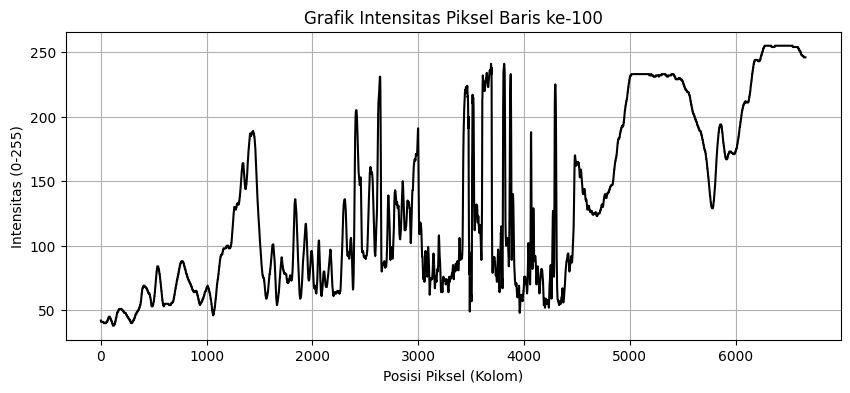

In [18]:
# ==============================================================
# GAMBAR 3: Grafik intensitas piksel 0–255
# ==============================================================
plt.figure(figsize=(10, 4))
plt.plot(row_data, color='black')
plt.title(f"Grafik Intensitas Piksel Baris ke-{row_index}")
plt.xlabel("Posisi Piksel (Kolom)")
plt.ylabel("Intensitas (0-255)")
plt.grid(True)
plt.show()

In [23]:
# 1. Buka file PNG

nameIMG = "Cb"

img = Image.open(f"img/{nameIMG}.png").convert("RGB")


img.save(f"img/{nameIMG}_100.jpg", "JPEG", quality=100)  # quality: 1–95

Blok 8x8 asli (nilai intensitas):
[[[130. 131. 129.]
  [130. 131. 129.]
  [130. 131. 129.]
  [130. 131. 129.]
  [130. 131. 129.]
  [130. 131. 129.]
  [130. 131. 130.]
  [130. 131. 129.]]

 [[130. 131. 129.]
  [130. 131. 129.]
  [130. 131. 129.]
  [130. 131. 129.]
  [130. 131. 129.]
  [130. 131. 130.]
  [130. 131. 130.]
  [130. 131. 129.]]

 [[130. 131. 129.]
  [130. 131. 129.]
  [130. 131. 129.]
  [130. 131. 129.]
  [130. 131. 129.]
  [130. 131. 130.]
  [130. 131. 130.]
  [130. 131. 129.]]

 [[130. 131. 129.]
  [130. 131. 129.]
  [130. 131. 129.]
  [130. 131. 129.]
  [130. 131. 130.]
  [130. 131. 130.]
  [130. 131. 130.]
  [130. 131. 130.]]

 [[130. 131. 130.]
  [130. 131. 129.]
  [130. 131. 129.]
  [130. 131. 129.]
  [130. 131. 130.]
  [130. 131. 130.]
  [130. 130. 130.]
  [130. 131. 130.]]

 [[130. 131. 130.]
  [130. 131. 129.]
  [130. 131. 129.]
  [130. 131. 130.]
  [130. 131. 130.]
  [130. 131. 130.]
  [130. 130. 130.]
  [130. 131. 130.]]

 [[130. 131. 130.]
  [130. 131. 130.]
  [1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [129.0..131.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..2.4696728437844713].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [129.0..131.0].


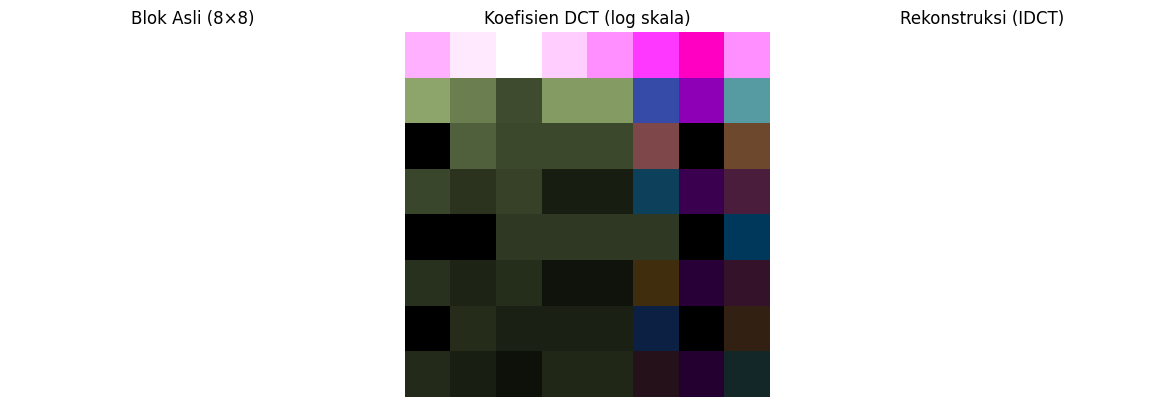

In [26]:
data = np.array(img, dtype=float)

# === 2️⃣ Ambil satu blok 8x8 dari kiri atas ===
block = data[0:8, 0:8]

print("Blok 8x8 asli (nilai intensitas):")
print(np.round(block, 2))

# === 3️⃣ Definisikan fungsi DCT 2D ===
def dct2(a):
    return dct(dct(a.T, norm='ortho').T, norm='ortho')

def idct2(a):
    return idct(idct(a.T, norm='ortho').T, norm='ortho')

# === 4️⃣ Hitung DCT dari blok ===
dct_block = dct2(block - 128)  # dikurangi 128 (bias JPEG)
print("\nHasil DCT 8x8:")
print(np.round(dct_block, 2))

# === 5️⃣ Hitung kembali (IDCT) untuk verifikasi ===
reconstructed = idct2(dct_block) + 128
print("\nRekonstruksi (IDCT):")
print(np.round(reconstructed, 2))

# === 6️⃣ Visualisasi ===
plt.figure(figsize=(12, 4))

# (a) Blok asli
plt.subplot(1, 3, 1)
plt.imshow(block, cmap='gray', vmin=0, vmax=255)
plt.title("Blok Asli (8×8)")
plt.axis('off')

# (b) Hasil DCT (frekuensi)
plt.subplot(1, 3, 2)
plt.imshow(np.log(np.abs(dct_block) + 1), cmap='gray')
plt.title("Koefisien DCT (log skala)")
plt.axis('off')

# (c) Rekonstruksi dari DCT
plt.subplot(1, 3, 3)
plt.imshow(reconstructed, cmap='gray', vmin=0, vmax=255)
plt.title("Rekonstruksi (IDCT)")
plt.axis('off')

plt.tight_layout()
plt.show()
